In [57]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [58]:
#Load data for train and test
train = pd.read_csv('C:/Users/rvaish/Documents/Python Scripts/HPP/HousePricingTutorial-Series2_train.csv')
test = pd.read_csv('C:/Users/rvaish/Documents/Python Scripts/HPP/HousePricingTutorial-Series2_test.csv')

In [59]:
#Shape of train data
train.shape

(1460, 81)

In [60]:
#Shape of test data
test.shape

(1459, 80)

Skew is: 0.12134661989685333


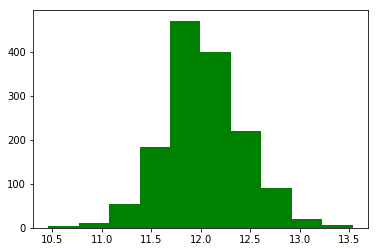

In [61]:
train['SalePrice'] = np.log1p(train['SalePrice'])

target = train['SalePrice']
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()

In [62]:
#Finding Numerical Columns
numeric_features = train.select_dtypes(include=[np.number])
#numeric_features.dtypes

In [63]:
#Finding the first five features are the most positively correlated with SalePrice
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')

SalePrice      1.000000
OverallQual    0.817185
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
Name: SalePrice, dtype: float64 



In [64]:
#Wow Feeling !!!

In [65]:
#Understanding NULL values.
Isnull=train.isnull().sum()
Isnull.sort_values(inplace=True, ascending=False)
print(Isnull)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [66]:
#Examining the NULL values and filling with appropriate values:

# PoolQC           1453
# MiscFeature      1406
# Alley            1369
# Fence            1179
# FireplaceQu       690
# LotFrontage       259
# GarageCond         81
# GarageType         81
# GarageYrBlt        81
# GarageFinish       81
# GarageQual         81
# BsmtExposure       38
# BsmtFinType2       38
# BsmtFinType1       37
# BsmtCond           37
# BsmtQual           37
# MasVnrArea          8
# MasVnrType          8
# Electrical          1


train['PoolQC'] = train['PoolQC'].fillna('None')
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
train['GarageType'] = train['GarageType'].fillna('None')
train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [67]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(int(0))
train['GarageArea'] = train['GarageArea'].fillna(int(0))
train['GarageCars'] = train['GarageCars'].fillna(int(0))
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [ ]:
#########################################################################################################

In [49]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [55]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [56]:
#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

In [ ]:
#########################################################################################################

In [ ]:
#Categorical variables are known to hide lot of interesting information in a data set.

In [ ]:
#To learn more on Categorical Variables - 
#https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

In [35]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [36]:
train[cols].head(5)

KeyError: ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [3]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
    

NameError: name 'train' is not defined

#### Prepraring data for prediction

In [339]:
#Take targate variable into y
y = train['SalePrice']

In [340]:
#Delete the saleprice
del train['SalePrice']

In [341]:
#Take their values in X and y
X = train.values
y = y.values

In [342]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Linear Regression

In [343]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [344]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [345]:
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [11.62221633]
Real value 11.767187766223199


In [346]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.26708677161434


### RandomForestRegression

In [259]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [260]:
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [261]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  90.56618132951972
